In [4]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [5]:
mean_gray = 0.1307
stddev_gray = 0.3081

# input[channel] = (input[channel] - mean[channel]) / std[channel]
# Normalize the image with mean and standard deviation of the dataset.
# The first parameter is the mean of the dataset, and the second parameter is the standard deviation of the dataset.

transforms = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((mean_gray,), (stddev_gray,))])

# Load the dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms)


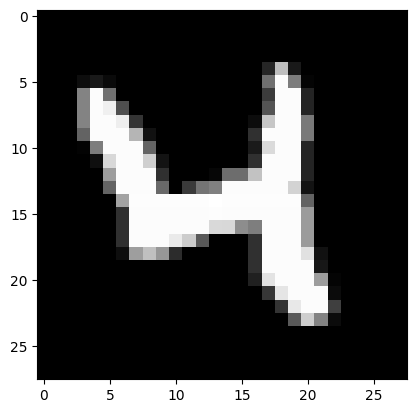

In [6]:
# Visualize the dataset
# Denormalize the image
random_img = train_dataset[20][0].numpy() * stddev_gray + mean_gray
plt.imshow(random_img.reshape(28, 28), cmap='gray')

In [7]:
# Label of the above image
train_dataset[20][1]

4

In [8]:
batch_size = 100
train_load = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_load = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
len(train_load)

600

![cnn mnist](https://user-images.githubusercontent.com/30661597/61713471-3c957d00-ad8b-11e9-9a38-e3f4d1e72565.png)

In [10]:
# Create the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # 1st convolutional layer
        # Same padding: (kernel_size - 1) / 2; same padding means the output size is the same as the input size.
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        # The output size of each of the 8 feature maps:
        # [(input_size - filter_size + 2 * padding) / stride] + 1 = [(28 - 3 + 2 * 1) / 1] + 1 = [27 / 1] + 1 = 28
        # Batch normalization
        self.batchnorm1 = nn.BatchNorm2d(8)
        # Apply ReLU activation function
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        # The output size of each of the 8 feature maps:
        # [(input_size - filter_size + 2 * padding) / stride] + 1 = [(28 - 2 + 2 * 0) / 2] + 1 = [26 / 2] + 1 = 14

        # 2nd convolutional layer
        # Choose the output channels to be 32
        # Choose the kernel size to be 5
        
        
        # Same padding = (5 - 1) / 2 = 2
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
        # The output size of each of the 32 feature maps:# [(input_size - filter_size + 2 * padding) / stride] + 1 = [(14 - 5 + 2 * 2) / 1] + 1 = [13 / 1] + 1 = 14
        # Batch normalization
        self.batchnorm2 = nn.BatchNorm2d(32)
        # We don't need to specify the activation function here, because we are using the same kernel size max pooling specified earlier.
        # Output size of each of the 32 feature maps: [(14 - 2 + 2 * 0) / 2] + 1 = [12 / 2] + 1 = 7

        # Flatten the 32 feature maps: 32 * 7 * 7 = 1568
        self.fc1 = nn.Linear(in_features=32*7*7, out_features=600)
        # Dropout layer is used to prevent overfitting and is only used during training.
        self.dropout = nn.Dropout(p=0.5)
        # Second fully connected layer
        self.fc2 = nn.Linear(in_features=600, out_features=10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool(out)

        # Flatten the output of the second convolutional layer
        out = out.view(-1, 32*7*7)

        # First fully connected layer
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

In [11]:
# Create the model
model = CNN()
CUDA = torch.cuda.is_available()
if CUDA:
    model = model.cuda()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [12]:
print(type(train_dataset))
print(len(train_dataset))
print(type(train_dataset[0]))
print(len(train_dataset[0]))
print(type(train_dataset[0][0]))
print(train_dataset[0][0].shape)
print(type(train_dataset[0][1]))
print(train_dataset[0][1])
print(train_dataset[0][0])

<class 'torchvision.datasets.mnist.MNIST'>
60000
<class 'tuple'>
2
<class 'torch.Tensor'>
torch.Size([1, 28, 28])
<class 'int'>
5
tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -

In [13]:
print(type(train_load))
print(len(train_load))

print(train_load.__iter__().__next__()[0].shape)
print(train_load.__iter__().__next__()[1].shape)
print(train_load.__iter__().__next__()[0][0].shape)
print(train_load.__iter__().__next__()[1])
print(train_load.__iter__().__next__()[0][0][0][0])
# print(len(train_load[0]))
# print(type(train_load[0][0]))
# print(train_load[0][0].shape)
# print(type(train_load[0][1]))
# print(train_load[0][1])
# print(train_load[0][0])

<class 'torch.utils.data.dataloader.DataLoader'>
600
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([1, 28, 28])
tensor([1, 4, 4, 7, 4, 7, 6, 2, 4, 3, 4, 4, 7, 7, 4, 4, 3, 6, 8, 0, 0, 3, 7, 6,
        3, 6, 0, 8, 1, 1, 1, 8, 7, 6, 9, 7, 2, 8, 1, 4, 0, 5, 7, 9, 2, 6, 6, 7,
        1, 8, 1, 8, 3, 7, 7, 4, 4, 0, 0, 1, 4, 1, 3, 5, 7, 1, 0, 0, 4, 2, 1, 0,
        2, 3, 6, 0, 0, 0, 1, 5, 4, 0, 1, 5, 7, 0, 4, 6, 8, 1, 1, 2, 0, 0, 0, 8,
        4, 3, 1, 9])
tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242])


In [14]:
# Understand what is happening in the forward propagation
# initialize the variables
iteration = 0
correct = 0

# Get the first batch of the training dataset
for i, (inputs, labels) in enumerate (train_load):
    if CUDA:
        inputs = inputs.cuda()
        labels = labels.cuda()
    print("For one iteration, this is what happens:")
    # Each tensor propagated through the network should be 4D - batch_size, channels, rows, columns
    print("Input Shape:",inputs.shape)
    print("Labels Shape:",labels.shape)
    output = model(inputs)
    print("Outputs Shape",output.shape)
    _, predicted = torch.max(output, 1)
    print("Predicted Shape",predicted.shape)
    print("Predicted Tensor:")
    print(predicted)
    correct += (predicted == labels).sum()
    break

For one iteration, this is what happens:
Input Shape: torch.Size([100, 1, 28, 28])
Labels Shape: torch.Size([100])
Outputs Shape torch.Size([100, 10])
Predicted Shape torch.Size([100])
Predicted Tensor:
tensor([4, 6, 5, 9, 1, 1, 9, 9, 4, 1, 1, 2, 1, 3, 1, 3, 0, 1, 9, 0, 1, 5, 9, 4,
        1, 9, 9, 7, 1, 1, 5, 3, 1, 0, 1, 4, 0, 1, 1, 5, 0, 6, 5, 9, 1, 0, 9, 1,
        4, 0, 0, 5, 9, 4, 5, 9, 4, 3, 4, 1, 1, 1, 1, 4, 0, 4, 4, 1, 4, 4, 6, 1,
        1, 0, 1, 4, 9, 1, 1, 1, 2, 0, 9, 3, 9, 9, 9, 3, 9, 1, 0, 1, 3, 1, 1, 1,
        5, 0, 6, 3], device='cuda:0')


In [24]:
# Training the CNN
num_epochs = 10 # number of epochs to train the model
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

# Train the model
for epoch in range(num_epochs):
    correct = 0
    iterations = 0
    iter_loss = 0.0

    model.train() # set the model to training mode
    for i, (inputs, labels) in enumerate(train_load):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        # Clear all accumulated gradients
        optimizer.zero_grad()
        # Forward pass - compute outputs on input data using the model
        outputs = model(inputs)
        # Compute loss
        loss = loss_fn(outputs, labels)
        # Backpropagate the gradients
        loss.backward()
        # Update the parameters
        optimizer.step()
        # Compute the total loss for the batch and add it to train_loss
        iter_loss += loss.item()
        # Compute the accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        iterations += 1

    train_loss.append(iter_loss/iterations)
    train_accuracy.append(100 * correct/len(train_dataset))

    # Evaluating the model
    loss = 0.0
    correct = 0
    iterations = 0
    
    model.eval() # set the model to evaluation mode
    for i, (inputs, labels) in enumerate(test_load):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        # Forward pass - compute outputs on input data using the model
        outputs = model(inputs)
        # Compute loss
        loss = loss_fn(outputs, labels)
        # Compute the total loss for the batch and add it to test_loss
        loss += loss.item()
        # Compute the accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        iterations += 1

    test_loss.append(loss/iterations)
    test_accuracy.append(100 * correct/len(test_dataset))

    print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Validation Loss: {:.3f}, Validation Accuracy: {:.3f}'
              .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))



Epoch 1/10, Training Loss: 0.036, Training Accuracy: 99.055, Validation Loss: 0.001, Validation Accuracy: 98.850
Epoch 2/10, Training Loss: 0.036, Training Accuracy: 99.108, Validation Loss: 0.001, Validation Accuracy: 99.020
Epoch 3/10, Training Loss: 0.037, Training Accuracy: 99.033, Validation Loss: 0.000, Validation Accuracy: 98.870
Epoch 4/10, Training Loss: 0.029, Training Accuracy: 99.215, Validation Loss: 0.000, Validation Accuracy: 98.750
Epoch 5/10, Training Loss: 0.033, Training Accuracy: 99.132, Validation Loss: 0.000, Validation Accuracy: 98.970
Epoch 6/10, Training Loss: 0.037, Training Accuracy: 99.087, Validation Loss: 0.000, Validation Accuracy: 98.920
Epoch 7/10, Training Loss: 0.034, Training Accuracy: 99.115, Validation Loss: 0.000, Validation Accuracy: 99.050
Epoch 8/10, Training Loss: 0.040, Training Accuracy: 99.063, Validation Loss: 0.001, Validation Accuracy: 98.460
Epoch 9/10, Training Loss: 0.039, Training Accuracy: 99.075, Validation Loss: 0.000, Validation 

[tensor(0.0014, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0008, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), tensor(4.4175e-08, device='cuda:0', grad_fn=<DivBackward0>), tensor(8.1243e-06, device='cuda:0', grad_fn=<DivBackward0>), tensor(1.2258e-07, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0008, device='cuda:0', grad_fn=<DivBackward0>), tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>), tensor(4.3839e-05, device='cuda:0', grad_fn=<DivBackward0>)]
<class 'list'>


AttributeError: 'list' object has no attribute 'device'

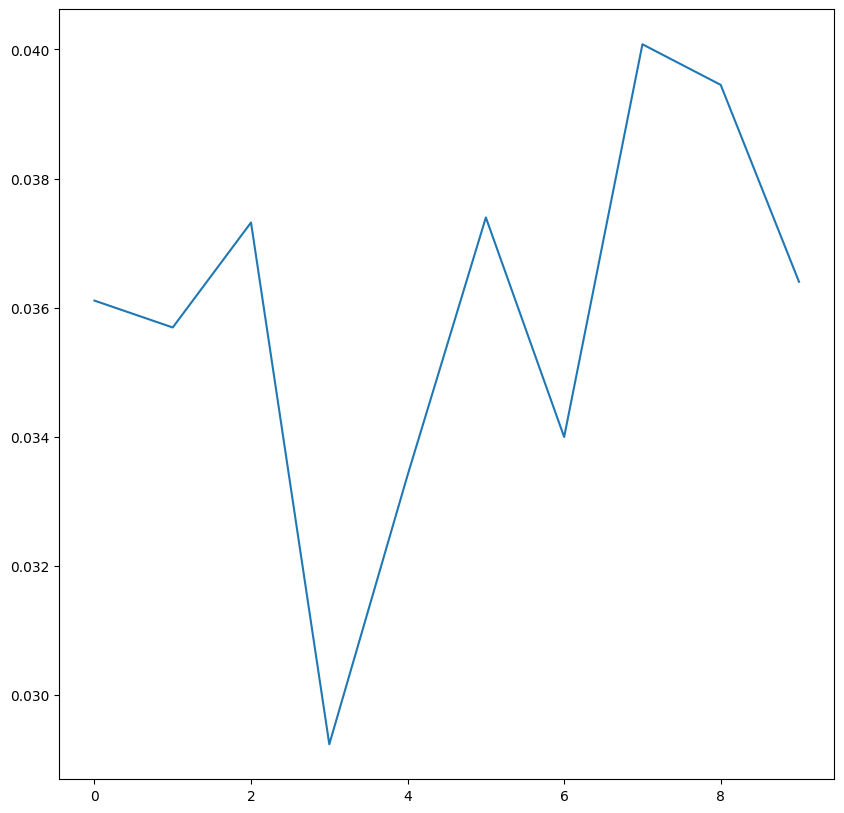

In [46]:
# Plot the training loss
f = plt.figure(figsize=(10, 10))
plt.plot(train_loss, label='Training Loss')
# test_loss = test_loss.to("cpu")
print(test_loss)
print(type(test_loss))
test_loss.device()

plt.plot(test_loss, label = 'Testing Loss')
plt.legend()
plt.show()

<class 'list'>
10
[98.85, 99.02, 98.87, 98.75, 98.97, 98.92, 99.05, 98.46, 98.86, 98.85]


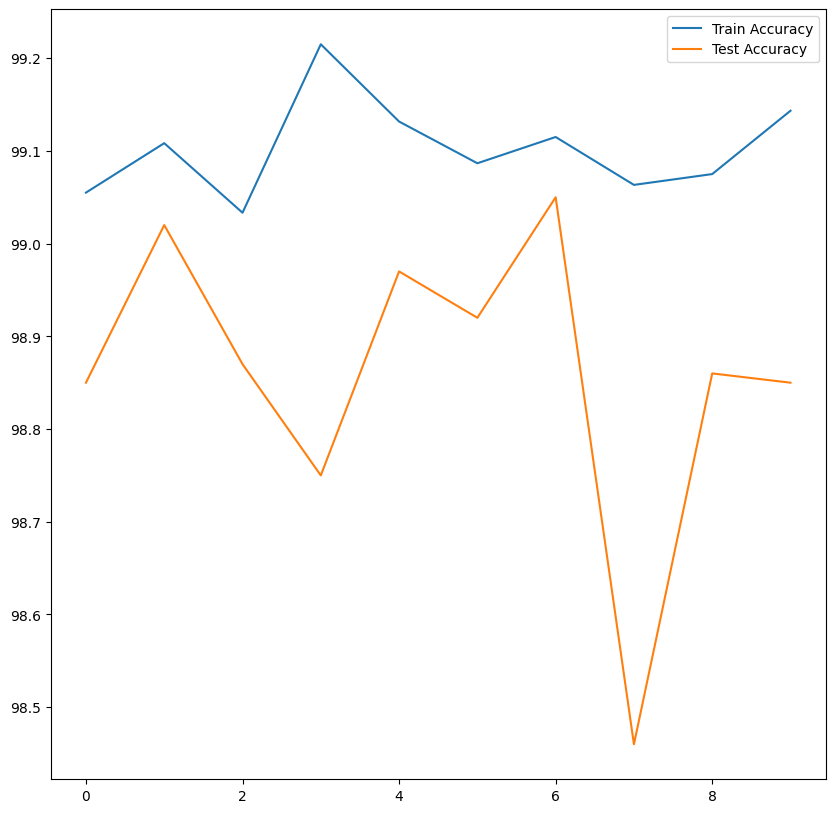

In [32]:
# Plot the training accuracy
plt.figure(figsize=(10, 10))
plt.plot(train_accuracy, label='Train Accuracy')
print (type(test_accuracy))
print (len(test_accuracy))
print (test_accuracy)
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend()
plt.show()